# Thermal Blooming Demo

In [1]:
import numpy as np
import poppy
import astropy.units as u
import matplotlib.pyplot as plt
from copy import deepcopy


w0 = 14.15*u.cm            # beam radius
P0 = 100e3                 # beam power (W)
L = 2.0*u.km               # propagation distance (m)
w_extend = 10              # weight of the spatial extend
wavelength = 10.6*u.um     # wavelength in vacuum (m)
M2 = 1.0                   # beam quality factor
n0 = 1.00027398            # ambient refractive index
R0 = L                     # initial radius of curvature
npix = 512                 # number of pixels
oversample = 1             # oversampling factor
Cn2 = 1.0e-14*u.m**(-2/3)  # index-of-refraction structure constant
aero_abs_coeff = 7e-7/u.cm # absorption coefficient due to aerosols
nz = 20                    # number of phase screens
dz = L/nz                  # propagation step
v0x = 200.0*u.cm/u.s       # ambient wind velocity in x-direction
v0y = 0.0*u.m/u.s          # ambient wind velocity in y-direction

In [2]:
wf = poppy.PhysicalFresnelWavefront(beam_radius=w_extend*w0/2,
                                    wavelength=wavelength,
                                    units=u.m,
                                    npix=npix,
                                    oversample=oversample,
                                    M2=M2, n0=n0)
wf *= poppy.GaussianAperture(w=w0)
wf *= poppy.QuadPhase(-R0)
wf.scale_power(P0)

Oversampling > 2x suggested for reliable results.


In [3]:
for l in range(nz+1):
    if l==0 or l==nz:
        delta = dz/2
    else:
        delta = dz
    wf.propagate_fresnel(delta)
    if l != nz:
        phase_screen = poppy.ThermalBloomingWFE(aero_abs_coeff, delta, v0x=v0x, direction='x', isobaric=True)    
        wf *= phase_screen

Text(0,0.5,'y (m)')

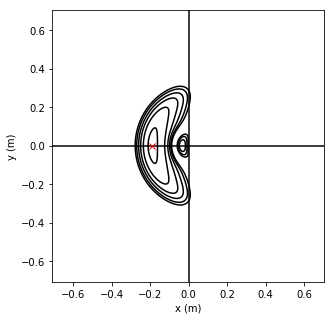

In [6]:
y, x = wf.coordinates()
z = wf.intensity.T
idx = np.unravel_index(np.argmax(z, axis=None), z.shape)

fig = plt.figure(figsize=(12,5))
fig.clf()

levels = np.array([0.09, 0.14, 0.23, 0.36, 0.57, 0.9])*z.max()
ax = fig.add_subplot(111)
cf = ax.contour(x, y, z, levels=levels, colors='k')
plt.plot([0.0, 0.0], [x.min(), x.max()], '-k')
plt.plot([x.min(), x.max()], [0.0, 0.0], '-k')
plt.plot([x[0,:][idx[1]]], [x[0,:][idx[0]]], 'xr')
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')